# Statistical Analysis of a Network of High-Tech Firms

Inspired by:

https://github.com/ericmjl/Network-Analysis-Made-Simple/

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

#### We download a network graph of high-tech firms available on the Network Repository:

http://networkrepository.com/soc-firm-hi-tech.php

In [42]:
G = nx.read_adjlist('soc-firm-hi-tech.txt')

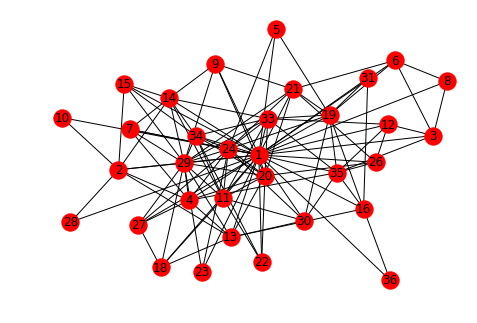

In [71]:
nx.draw(G, with_labels=True)
plt.show()

## 1. Basic network statistics 

#### Basic attributes:

In [44]:
print('No. of nodes: ' + str(len(G.nodes())))
print('No. of edges: ' + str(len(G.edges())))

No. of nodes: 33
No. of edges: 123


#### We compute several centrality measures for the nodes in the network:

In [45]:
nodestats = {'Degree centrality': list(nx.degree_centrality(G).values()), 'Betweenness centrality': list(nx.betweenness_centrality(G).values()), 'Closeness centrality': list(nx.closeness_centrality(G).values())}
nodestats = pd.DataFrame(nodestats, index=list(map(int, list(nx.betweenness_centrality(G).keys()))))
nodestats.sort_index(inplace=True)
nodestats.head()

,Degree centrality,Betweenness centrality,Closeness centrality
1,1.06250,0.552655,1.000000
2,0.25000,0.013609,0.571429
3,0.15625,0.003696,0.542373
4,0.28125,0.010551,0.581818
5,0.09375,0.000000,0.524590


#### Histograms of the centrality measures for the network:

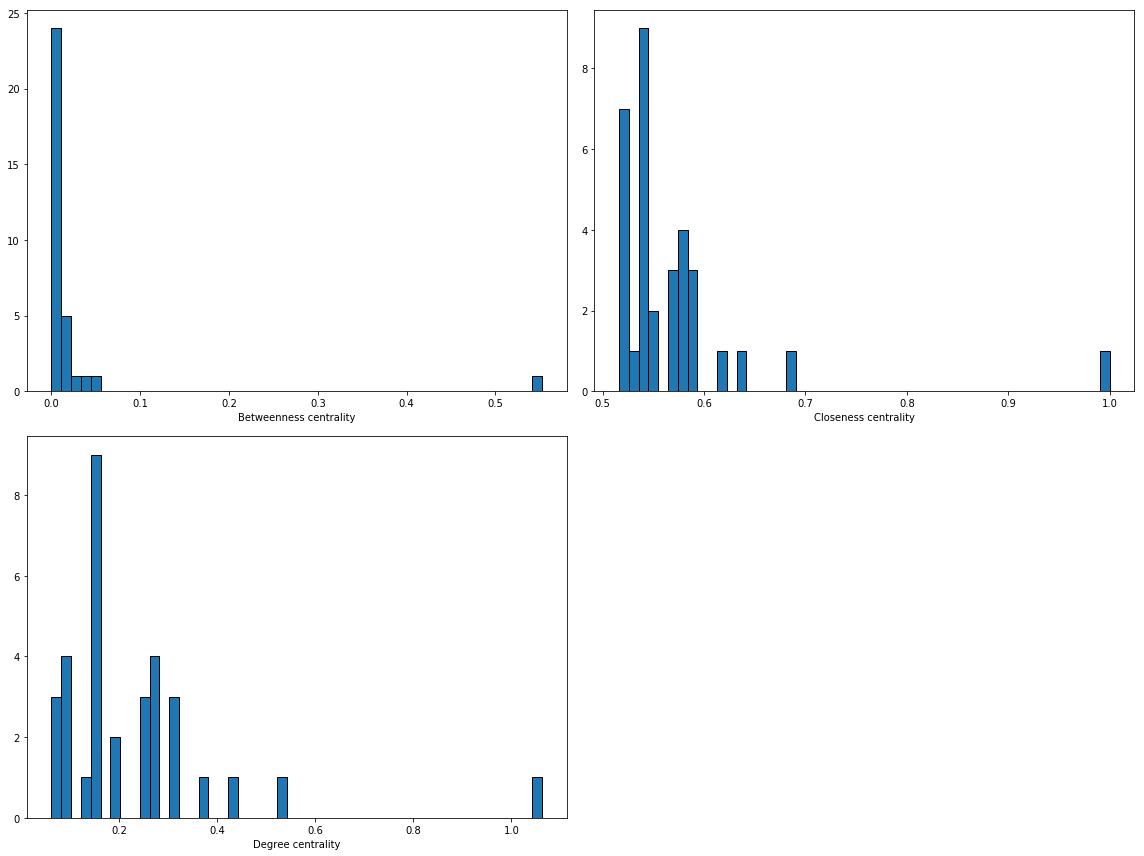

In [46]:
f = plt.figure(figsize = (16, 12))

ax00 = plt.subplot2grid((2,2),(0, 0))
ax01 = plt.subplot2grid((2,2),(0, 1))
ax10 = plt.subplot2grid((2,2),(1, 0))

ax00.hist(nodestats['Betweenness centrality'], bins=50, histtype='bar', ec = 'black')
ax00.set_xlabel('Betweenness centrality')

ax01.hist(nodestats['Closeness centrality'], bins=50, histtype='bar', ec = 'black')
ax01.set_xlabel('Closeness centrality')

ax10.hist(nodestats['Degree centrality'], bins=50, histtype='bar', ec = 'black')
ax10.set_xlabel('Degree centrality')

plt.tight_layout()
plt.show()

#### Some basic summary statistics of the centrality measures:

In [47]:
nodestats.describe()

,Degree centrality,Betweenness centrality,Closeness centrality
count,33.000000,33.000000,33.000000
mean,0.232955,0.024804,0.573347
std,0.185552,0.095495,0.085094
min,0.062500,0.000000,0.516129
25%,0.156250,0.000504,0.542373
50%,0.156250,0.003696,0.542373
75%,0.281250,0.011660,0.581818
max,1.062500,0.552655,1.000000


#### From the histograms, there are outlier nodes which are very central according to all three centrality measures. To find them, we sort the nodes by each measure, and look at the five most central nodes under each measure. 

#### Nodes 1, 29, 24, 20 are the most central by all three measures, hence they are likely to be important. We'd need more information about this network to investigate further.

In [48]:
node_dfs = [pd.DataFrame(nodestats[x].sort_values(ascending = False).head()) for x in nodestats.columns]

node_dfs[0]

,Degree centrality
1,1.06250
29,0.53125
24,0.43750
20,0.37500
33,0.31250


In [49]:
node_dfs[1]

,Betweenness centrality
1,0.552655
29,0.054704
24,0.037164
20,0.022278
19,0.021875


In [50]:
node_dfs[2]

,Closeness centrality
1,1.000000
29,0.680851
24,0.640000
20,0.615385
33,0.592593


## 2. Comparison with Erdos-Renyi random graph model

#### The Erdos-Renyi (ER) family of random graphs is a simple model for random graphs with a fixed number of nodes n. We review the basics of this family. A graph in the ER family is generated as follows: for each pair of nodes, we flip a coin which has probability p of coming up heads (all coin flips are assumed independent). If the result of a given coin flip is heads, we connect the pair of nodes by an edge. Otherwise, we don't.

#### We now generate a graph from the Erdos-Renyi random family and compare it to the graph of the high-tech firm network. We use the density of the high-tech firm network (i.e., the number of edges divided by the maximum possible number of edges in a graph with n nodes) as the probability p of heads.

In [51]:
npr.seed(3941)

erG = nx.erdos_renyi_graph(len(G.nodes()), nx.density(G))

#### We compute several centrality measures for the nodes in the ER graph: degree centrality, betweenness centrality, and closeness centrality.

In [52]:
er_nodestats = {'Degree centrality': list(nx.degree_centrality(erG).values()), 'Betweenness centrality': list(nx.betweenness_centrality(erG).values()), 'Closeness centrality': list(nx.closeness_centrality(erG).values())}
er_nodestats = pd.DataFrame(er_nodestats, index=list(map(int, list(nx.betweenness_centrality(erG).keys()))))
er_nodestats.sort_index(inplace=True)
er_nodestats.head()

,Degree centrality,Betweenness centrality,Closeness centrality
0,0.28125,0.047458,0.542373
1,0.25000,0.054414,0.516129
2,0.25000,0.035704,0.516129
3,0.18750,0.038461,0.484848
4,0.09375,0.010816,0.421053


#### Summary statistics of the centrality measures for the ER-graph.

In [53]:
er_nodestats.describe()

,Degree centrality,Betweenness centrality,Closeness centrality
count,33.000000,33.000000,33.000000
mean,0.191288,0.034946,0.485781
std,0.069771,0.024626,0.050967
min,0.062500,0.000000,0.359551
25%,0.125000,0.013569,0.457143
50%,0.187500,0.036218,0.492308
75%,0.250000,0.049076,0.524590
max,0.312500,0.100225,0.561404


#### Histograms of the centrality measures for the ER graph.

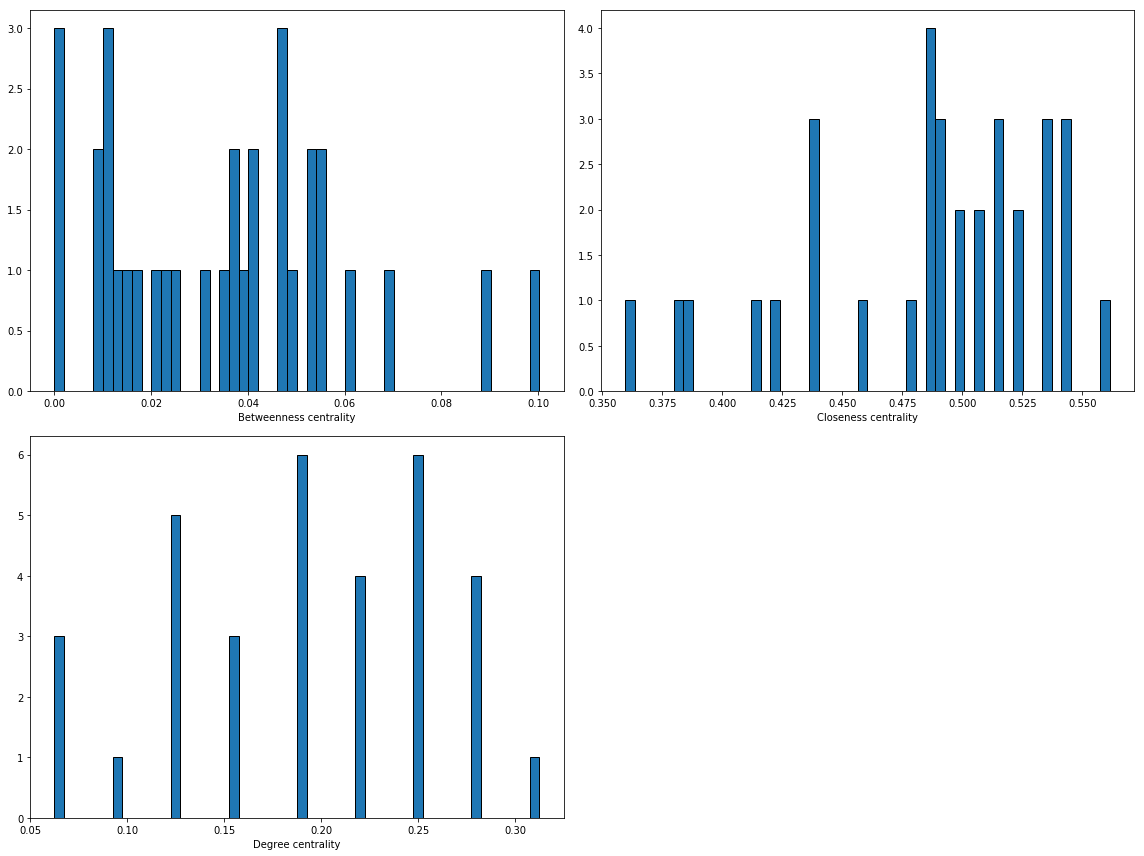

In [54]:
f = plt.figure(figsize = (16, 12))

ax00 = plt.subplot2grid((2,2),(0, 0))
ax01 = plt.subplot2grid((2,2),(0, 1))
ax10 = plt.subplot2grid((2,2),(1, 0))

ax00.hist(er_nodestats['Betweenness centrality'], bins=50, histtype='bar', ec = 'black')
ax00.set_xlabel('Betweenness centrality')

ax01.hist(er_nodestats['Closeness centrality'], bins=50, histtype='bar', ec = 'black')
ax01.set_xlabel('Closeness centrality')

ax10.hist(er_nodestats['Degree centrality'], bins=50, histtype='bar', ec = 'black')
ax10.set_xlabel('Degree centrality')

plt.tight_layout()
plt.show()

## 3. Statistical inference with the ER random graph model.

#### The histograms of these node statistics for the ER graph don't look like those of our graph, suggesting that the ER family isn't a good model for our network graph. We do a little statistical inference to confirm this. 

#### We produce histograms of the mean betweenness, closeness, and degree centralities for a sample of 1000 ER graphs. We perform a simple hypothesis test and compare these histograms with the values of those centrality measures for our network graph by computing the empirical p-values. If these p-values are small (< 0.05), it's unlikely the network graph came from the ER family.

In [55]:
n_sims = 1000

er_dc_means = er_bc_means = er_cc_means = np.zeros(n_sims)

for i in range(n_sims):
    
    erG = nx.erdos_renyi_graph(n=len(G.nodes()), p=nx.density(G))
    
    erG_deg_centralities = list(nx.degree_centrality(erG).values())
    erG_clo_centralities = list(nx.closeness_centrality(erG).values())
    erG_bet_centralities = list(nx.betweenness_centrality(erG).values())
    
    er_dc_means[i] = np.mean(erG_deg_centralities)
    er_bc_means[i] = np.mean(erG_bet_centralities)
    er_cc_means[i] = np.mean(erG_clo_centralities)

#### Histogram of mean degree centrality for ER-family. The histogram is in blue, the mean degree centrality of our network graph is indicated by the red vertical line. 

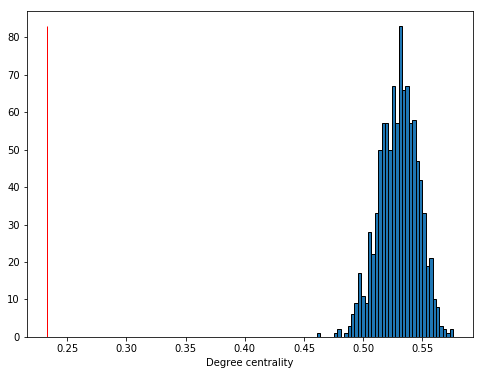

In [56]:
dc_mean = nodestats['Degree centrality'].mean()

f = plt.figure(figsize = (8, 6))

n, bins, patches, = plt.hist(er_dc_means, histtype='bar', ec = 'black', bins=40)
plt.vlines(dc_mean, ymin=0, ymax=max(n), color='red', lw=1)
plt.xlabel('Degree centrality')
plt.show()

#### The mean degree centrality of our network graph is far away from the histogram, suggesting the ER family is not a good model for our graph. We make this precise by computing the p-value. It is zero, meaning it is very unlikely that our graph is modeled by the ER family.

In [57]:
dc_p_value = sum([i <= dc_mean for i in er_dc_means]) / n_sims
dc_p_value

0.0

#### We do a similar analysis for betweenness centrality.

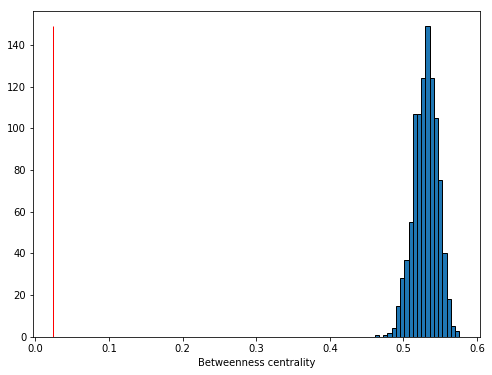

In [58]:
bc_mean = nodestats['Betweenness centrality'].mean()

f = plt.figure(figsize = (8, 6))
n, bins, patches, = plt.hist(er_bc_means, histtype='bar', ec = 'black', bins=20)
plt.vlines(bc_mean, ymin=0, ymax=max(n), color='red', lw=1)
plt.xlabel('Betweenness centrality')
plt.show()

#### The empirical p-value for betweenness centrality is also zero, confirming it is very unlikely that our graph is modeled by the ER family.:

In [59]:
bc_p_value = sum([i <= bc_mean for i in er_bc_means]) / n_sims
bc_p_value

0.0

#### And finally we repeat the analysis for closeness centrality.

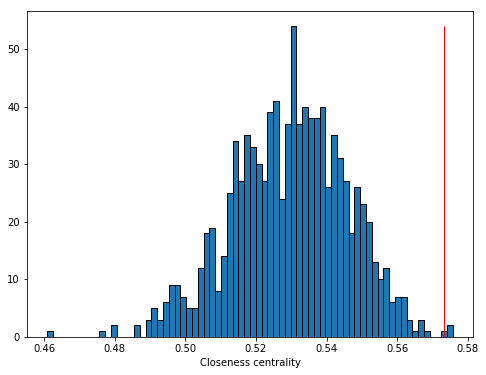

In [60]:
cc_mean = nodestats['Closeness centrality'].mean()

f = plt.figure(figsize = (8, 6))
n, bins, patches, = plt.hist(er_cc_means, histtype='bar', ec = 'black', bins=70)
plt.vlines(cc_mean, ymin=0, ymax=max(n), color='red', lw=1)
plt.xlabel('Closeness centrality')
plt.show()

#### This time, the empirical p-value for the closeness centrality is nonzero, but it is still < 0.05, giving further evidence that the ER family is not a good model for our network. 

In [61]:
cc_p_value = sum([i >= cc_mean for i in er_cc_means]) / n_sims
cc_p_value

0.002

## 4. Summary

#### We have analyzed a publicly available network of high-tech companies. We computed summary statistics and centrality measures (degree, betweenness, closeness) and examined the most important nodes under these measures. We used these centrality measures to perform hypothesis tests to see whether the Erdos-Renyi (ER) random graph model is a reasonable model for this graph. The p-values for all tests were all smaller than 0.05, thus we conclude the ER model is not a good model for our network of high-tech companies.